# K Nearest Neighbors 

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.


## Import Libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
data = pd.read_csv("Classified Data", index_col=0)

In [3]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(data.drop('TARGET CLASS',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [7]:
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( scaled_features, data['TARGET CLASS'], test_size=0.30 )

## Using KNN

 We'll start with k=1.

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
prediction_1 = knn.predict(X_test)

## Predictions and Evaluations

In [12]:
print(confusion_matrix(y_test, prediction_1))

[[131  12]
 [ 18 139]]


In [13]:
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       143
           1       0.92      0.89      0.90       157

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Using Elbow Method to Choose a Better K Value

In [14]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

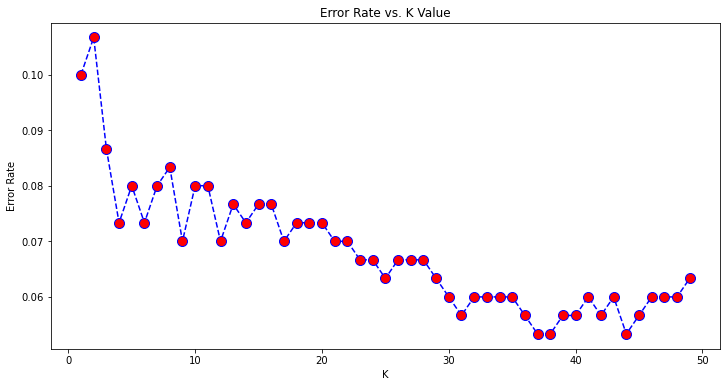

In [15]:
plt.figure(figsize=(12,6))

plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Here we can see that that the error rate is just around '0.1', which is a good. However at K=38 error rate is between 0.06 to 0.05. Let's retrain the model with that and check the classification report !!

In [16]:
# For a Quick Comparision to Our Original K=1

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, prediction_1))
print('\n') 
print(classification_report(y_test, prediction_1))

WITH K=1


[[131  12]
 [ 18 139]]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       143
           1       0.92      0.89      0.90       157

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [17]:
# NOW WITH K=38

knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(X_train, y_train)
prediction_38 = knn.predict(X_test)

print('WITH K=38')
print('\n')
print(confusion_matrix(y_test, prediction_38))
print('\n')
print(classification_report(y_test, prediction_38))

WITH K=38


[[139   4]
 [ 12 145]]


              precision    recall  f1-score   support

           0       0.92      0.97      0.95       143
           1       0.97      0.92      0.95       157

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



 We were able to squeeze some more performance out of our model by tuning to a better K value !!